최종 데이터로 시행한 로지스틱 회귀분석
==
최적 하이퍼 파라미터:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.932
--

In [1089]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [1090]:
fd = pd.read_csv('/content/drive/MyDrive/Finance data/end.csv')
fd.drop('년도', axis=1, inplace=True)
fd.drop('월', axis=1, inplace=True)
fd.set_index('날짜', inplace=True)

In [1091]:
_fd = fd.drop('등락률label',axis=1)
fd_target = fd['등락률label']
_fd = _fd.values.tolist()

In [1093]:
# StandardScaler()로 평균이 0, 분산 1과 데이터 분포도 현황
scaler = StandardScaler()
data_scaled_ = scaler.fit_transform(_fd)

X_train, X_test, y_train, y_test = train_test_split(
    data_scaled_, fd_target, test_size=0.3, random_state = 0)

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'], 'C': [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid =params, scoring = 'accuracy', cv=3)
grid_clf.fit(data_scaled_ , fd_target)
# StandardScaler()로 평균이 0, 분산 1과 데이터 분포도 현황
scaler = StandardScaler()
data_scaled_ = scaler.fit_transform(_fd)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

accuracy: 0.919
roc_auc: 0.914
최적 하이퍼 파라미터:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.932


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [1094]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1= False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1 :
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###', model.__class__.__name__, '###')
  evaluate_regr(y_test, pred)

#end of function get_model_prediction

# model 별로 평가 수행
lrs = LogisticRegression()
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lrs, lr_reg, ridge_reg, lasso_reg] : 
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LogisticRegression ###
RMSLE: 0.284, RMSE: 0.488, MAE:0.139
### LinearRegression ###
RMSLE: 0.336, RMSE: 0.652, MAE:0.533
### Ridge ###
RMSLE: 0.332, RMSE: 0.625, MAE:0.525
### Lasso ###
RMSLE: 0.330, RMSE: 0.641, MAE:0.531


Feature_importance 상위 6개 features만 선별해서 시행한 로지스틱 회귀분석
==
최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.713
--

In [1138]:
df = pd.read_csv('/content/drive/MyDrive/Finance data/end.csv')
df.drop('년도', axis=1, inplace=True)
df.drop('월', axis=1, inplace=True)
df.set_index('날짜', inplace=True)

In [1139]:
_df = df.drop('등락률label',axis=1)
df_target = df['등락률label']

In [1140]:
_df = _df.loc[:, ['외국인순매수', '기관순매수', '개인순매수', '시가총액대비', '100기준동행지수', '동행등락label']]
_df = _df.values.tolist()

In [1141]:
# StandardScaler()로 평균이 0, 분산 1과 데이터 분포도 현황
scaler = StandardScaler()
df_scaled = scaler.fit_transform(_df)

X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, df_target, test_size=0.3, random_state = 0)

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'], 'C': [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid =params, scoring = 'accuracy', cv=3)
grid_clf.fit(df_scaled , df_target)
# StandardScaler()로 평균이 0, 분산 1과 데이터 분포도 현황
scaler = StandardScaler()
df_scaled = scaler.fit_transform(_df)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

accuracy: 0.661
roc_auc: 0.657
최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.713


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [1142]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1= False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1 :
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###', model.__class__.__name__, '###')
  evaluate_regr(y_test, pred)

#end of function get_model_prediction

# model 별로 평가 수행
lrs = LogisticRegression()
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lrs, lr_reg, ridge_reg, lasso_reg] : 
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LogisticRegression ###
RMSLE: 0.582, RMSE: 1.000, MAE:0.582
### LinearRegression ###
RMSLE: 0.440, RMSE: 0.762, MAE:0.659
### Ridge ###
RMSLE: 0.439, RMSE: 0.761, MAE:0.663
### Lasso ###
RMSLE: 0.442, RMSE: 0.765, MAE:0.668


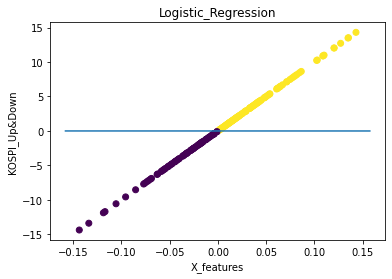

In [1143]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##########데이터 로드

x_data = np.array(_fd)
y_data = np.array(fd_target)

##########데이터 분석

##########데이터 전처리

##########모델 생성
model = LogisticRegression(penalty='l2', C=10)


##########모델 학습

model.fit(x_data, y_data)

x_data, y_data = np.array(x_data), np.array(y_data)

import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
#
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
#
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x_plot = np.linspace(xmin,xmax) #np.linspace(start, stop, num=50)
'''
for coef, intercept in zip(model.coef_,model.intercept_):
    plt.plot(x_plot, -(x_plot * coef[0] + intercept)/ coef[1])
'''
#'''
plt.plot(x_plot, -(x_plot * model.coef_[0][0] + model.intercept_[0])/ model.coef_[0][1])

#
plt.title('Logistic_Regression')
plt.xlabel('X_features')
plt.ylabel('KOSPI_Up&Down')
plt.show()